### (2) LDA (Linear Discriminant Analysis)

#### * 붓꽃 데이터 세트에 LDA 적용하기

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()

X = StandardScaler().fit_transform(iris.data)
y = iris.target

X
X.shape

(150, 4)

In [4]:
#2개의 컴포넌트로 붓꽃 데이터를 LDA 변환
lda = LinearDiscriminantAnalysis(n_components=2)

#LDA 적용 시 클래스의 '결정값' 도 함께 필요하다
lda.fit_transform(X, y)
lda.fit_transform(X, y).shape

(150, 2)

In [6]:
#LDA 변환된 입력 데이터 값을 2차원 평면에 시각화
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
iris_lda = lda.fit_transform(X, y)
lda_columns = ['lda_component_1', 'lda_component_2']
iris_lda_DF = pd.DataFrame(iris_lda, columns = lda_columns)
iris_lda_DF['target'] = iris.target

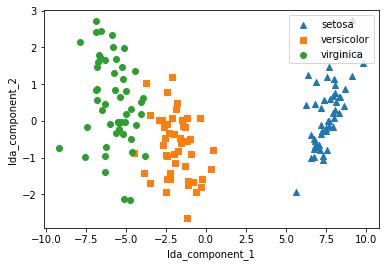

In [10]:
markers = ['^', 's', 'o']

#target 값 : setosa - 0, versicolor - 1, virginica - 2
for i, marker in enumerate(markers):
    x_axis_data = iris_lda_DF[iris_lda_DF['target'] == i]['lda_component_1']
    y_axis_data = iris_lda_DF[iris_lda_DF['target'] == i]['lda_component_2']
    
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])
    
plt.legend(loc = 'upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

### (3) SVD (Singular Value Decomposition)

### * Truncated SVD

In [11]:
from sklearn.decomposition import TruncatedSVD

In [18]:
import numpy as np
from numpy.linalg import svd

In [19]:
np.random.seed(121)
a = np.random.randn(4,4)
np.round(a, 3)

array([[-0.212, -0.285, -0.574, -0.44 ],
       [-0.33 ,  1.184,  1.615,  0.367],
       [-0.014,  0.63 ,  1.71 , -1.327],
       [ 0.402, -0.191,  1.404, -1.969]])

In [22]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)

print('U matrix:\n', np.round(U, 3))
print('Sigma Value:\n', np.round(Sigma, 3))
print('Vt matrix:\n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
Vt matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [23]:
#Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
b = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(b, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [28]:
Sigma_mat

array([[3.4229581 , 0.        , 0.        , 0.        ],
       [0.        , 2.02287339, 0.        , 0.        ],
       [0.        , 0.        , 0.46263157, 0.        ],
       [0.        , 0.        , 0.        , 0.07935069]])

In [24]:
#Truncated SVD를 이용해 행렬 분해
from scipy.sparse.linalg import svds
from scipy.linalg import svd

In [25]:
np.random.seed(121)
matrix = np.random.random((6,6))
matrix

array([[0.11133083, 0.21076757, 0.23296249, 0.15194456, 0.83017814,
        0.40791941],
       [0.5557906 , 0.74552394, 0.24849976, 0.9686594 , 0.95268418,
        0.48984885],
       [0.01829731, 0.85760612, 0.40493829, 0.62247394, 0.29537149,
        0.92958852],
       [0.4056155 , 0.56730065, 0.24575605, 0.22573721, 0.03827786,
        0.58098021],
       [0.82925331, 0.77326256, 0.94693849, 0.73632338, 0.67328275,
        0.74517176],
       [0.51161442, 0.46920965, 0.6439515 , 0.82081228, 0.14548493,
        0.01806415]])

In [27]:
U, Sigma, Vt = svd(matrix, full_matrices = False)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma 행렬:', Sigma)

(6, 6) (6,) (6, 6)
Sigma 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]


In [32]:
#Truncated SVD로 Sigma 행렬의 특이값을 '4개' 로 하여 Truncated SVD 수행
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=4)
print(U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('Sigma 행렬:', Sigma_tr)

(6, 4) (4,) (4, 6)
Sigma 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]


In [33]:
#Truncated SVD로 분해 후 복원 행렬
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)
matrix_tr

array([[0.19222941, 0.21792946, 0.15951023, 0.14084013, 0.81641405,
        0.42533093],
       [0.44874275, 0.72204422, 0.34594106, 0.99148577, 0.96866325,
        0.4754868 ],
       [0.12656662, 0.88860729, 0.30625735, 0.59517439, 0.28036734,
        0.93961948],
       [0.23989012, 0.51026588, 0.39697353, 0.27308905, 0.05971563,
        0.57156395],
       [0.83806144, 0.78847467, 0.93868685, 0.72673231, 0.6740867 ,
        0.73812389],
       [0.59726589, 0.47953891, 0.56613544, 0.80746028, 0.13135039,
        0.03479656]])

### * 사이킷런 TruncatedSVD 클래스

In [34]:
from sklearn.decomposition import TruncatedSVD

In [35]:
iris = load_iris()

X = StandardScaler().fit_transform(iris.data)
y = iris.target

In [36]:
tsvd = TruncatedSVD(n_components = 2)
iris_tsvd = tsvd.fit_transform(X)

In [37]:
X.shape

(150, 4)

In [38]:
tsvd.fit_transform(X).shape

(150, 2)

In [39]:
iris_tsvd

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

Text(0, 0.5, 'TruncatedSVD Component 2')

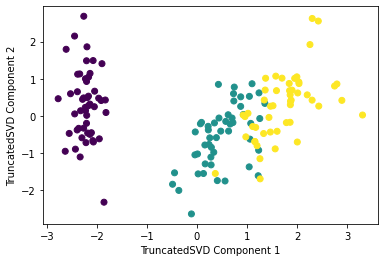

In [41]:
#2차원으로 TruncatedSVD 변환된 데이터 시각화
plt.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

## 7. 군집화

### (1) K-평균 알고리즘 이해
참고 ppt http://naver.me/58FkRDF2

#### * K-평균을 이용한 붓꽃 데이터 세트 군집화

In [42]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [43]:
iris = load_iris()

irisDF = pd.DataFrame(data = iris.data, columns = iris.feature_names)
irisDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [44]:
#데이터 세트를 3개 그룹으로 군집화
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [45]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [49]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_

irisDF.groupby(['target', 'cluster'])['sepal length (cm)'].count()

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal length (cm), dtype: int64

In [51]:
#변수의 개수 축소 : 4개->2개, PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_tf = pca.fit_transform(iris.data)
pca_tf

irisDF['pca_x'] = pca_tf[:, 0]
irisDF['pca_y'] = pca_tf[:, 1]
irisDF[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755
